In [3]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

import pickle
import string
import numpy as np
import random
from collections import Counter

In [4]:
#import nltk
#nltk.download('punkt')
#from nltk.tokenize import sent_tokenize
import nltk.data
sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')

# Can skip ahead if you're just dealing with nyt, breit, wapo test data

In [59]:
try:
    total_df = pd.read_pickle('total_df.p')
except:
    df_1 = pd.read_csv('articles1.csv')
    df_2 = pd.read_csv('articles2.csv')
    df_3 = pd.read_csv('articles3.csv')
    #print(df_1.head(1))
    print(df_1.shape)

    #print(df_1.publication.unique())
    #print(df_2.publication.unique())
    #print(df_3.publication.unique())
    #merge dataframes
    total_df = pd.concat([df_1, df_2, df_3])
    df_1 = 0
    df_2 = 0
    df_3 = 0
    total_df['sentence_count'] = 0
    total_df['word_count'] = 0
    total_df.to_pickle('total_df.p')
publication_names = total_df.publication.unique()

In [ ]:
total_df.publication.value_counts().plot(kind='bar')

In [ ]:
#print(list(total_df))
#print(total_df.loc[total_df['publication'] == 'New York Times']['title'])

In [66]:
#nyt_list = total_df.loc[total_df['publication'] == 'New York Times']['content'].tolist()
nyt_df = total_df.loc[total_df['publication'] == 'New York Times']
nyt_semic = nyt_df[nyt_df['content'].str.contains(";")]
#breit_list = total_df.loc[total_df['publication'] == 'Breitbart']['content'].tolist()
#wapo_list = total_df.loc[total_df['publication'] == 'Washington Post']['content'].tolist()

In [67]:
print(nyt_semic.shape)

(0, 12)


In [18]:
def rand_list(num_articles):
    return [random.random() for _ in range(num_articles)]

In [21]:
def get_id_content_list(pubname, num_articles):
    df_cont_list = total_df.loc[total_df['publication'] == pubname]['content'].tolist()
    df_id_list = total_df.loc[total_df['publication'] == pubname]['id'].tolist()
    num_articles_in_set = len(df_id_list)
    num_rand_to_get = num_articles_in_set if num_articles > num_articles_in_set else num_articles
    if num_articles > num_articles_in_set:
        print('Warning!', pubname, 'only has ', str(len(df_id_list)), ' articles, but you are asking for ', str(num_articles))
    random_num_list = rand_list(num_articles_in_set)
    cont_list = [i for ci,i in enumerate(df_cont_list) if random_num_list[ci] > 1-num_rand_to_get/num_articles_in_set]
    id_list =   [i for ci,i in enumerate(df_id_list)   if random_num_list[ci] > 1-num_rand_to_get/num_articles_in_set]
    return cont_list, id_list

In [23]:
num_articles = 3000

nyt_list, nyt_id = get_id_content_list('New York Times', num_articles)

breit_list, breit_id = get_id_content_list('Breitbart', num_articles)
wapo_list, wapo_id = get_id_content_list('Washington Post', num_articles)
print(len(nyt_list), len(breit_list), len(wapo_list))
print(nyt_list[0][:200], nyt_id[0])

3040 2990 3056
After the bullet shells get counted, the blood dries and the votive candles burn out, people peer down from   windows and see crime scenes gone cold: a band of yellow police tape blowing in the breeze 17284


In [111]:
def prepare_text(publication_content_list):
    if type(publication_content_list) is not list:
        publication_content_list = [publication_content_list]
    #lower case text
    lower_case = [text.strip().lower() for text in publication_content_list]
    #replace strange quote characters with normal ones 
    replace_quotes = [text.replace('“', '"').replace('”', '"') for text in lower_case]
    #do punkt sentence tokenization
    sentence_tokenize = [sent_detector.tokenize(text.strip()) for text in replace_quotes]
    #do nltk word tokenization
    word_tokenize = [nltk.word_tokenize(text) for text in replace_quotes]
    #get unique string counts
    string_counts = [Counter(text) for text in word_tokenize]
    return sentence_tokenize, word_tokenize, string_counts

In [25]:
nyt_sent, nyt_word, nyt_string_count = prepare_text(nyt_list)

In [26]:
breit_sent, breit_word, breit_string_count = prepare_text(breit_list)

In [27]:
wapo_sent, wapo_word, wapo_string_count = prepare_text(wapo_list)

In [28]:
pickle.dump( ['nyt', nyt_id, nyt_sent, nyt_word, nyt_string_count], open( "nyt_tokenized_strings.p", "wb" ) )
pickle.dump( ['breit', breit_id, breit_sent, breit_word, breit_string_count], open( "breit_tokenized_strings.p", "wb" ) )
pickle.dump( ['wapo', wapo_id, wapo_sent, wapo_word, wapo_string_count], open( "wapo_tokenized_strings.p", "wb" ) )

# ['breit', breit_sent, breit_word, breit_string_count],
# ['wapo', wapo_sent, wapo_word, wapo_string_count]]

# Can start here if you don't care about which articles you got, and you have the article pickle files

In [5]:
#unpickle files
pub, nyt_id, nyt_sent, nyt_word, nyt_string_count = pickle.load( open( "nyt_tokenized_strings.p", "rb" ) )
pub, breit_id, breit_sent, breit_word, breit_string_count = pickle.load( open( "breit_tokenized_strings.p", "rb" ) )
pub, wapo_id, wapo_sent, wapo_word, wapo_string_count = pickle.load( open( "wapo_tokenized_strings.p", "rb" ) )

In [6]:
translator = str.maketrans('', '', string.punctuation + '”“')
punctuation_set = set(string.punctuation + '”“')

In [7]:
class Publication():
    
    def __init__(self, pub_id = '', pub_id_list = [], pub_sent = [], pub_word = [], pub_string_count = []):
        self.publication_name = pub_id
        self.id_list = pub_id_list
        self.sent_tok = pub_sent
        self.word_tok = pub_word
        self.string_count = pub_string_count
    
    def calc_word_count(self):
        self.word_count = [len(text) for text in self.word_tok]
        
    def calc_sent_count(self):
        self.sent_count = [len(text) for text in self.sent_tok]
        
    def calc_sent_len(self):
        if not self.word_count:
            self.calc_word_count()
        if not self.sent_count:
            self.calc_sent_count
        self.sent_len = [i/j for i,j in zip(self.word_count, self.sent_count)]
        
    def calc_unique_words(self):
        self.unique_wc = [len(set([word for word in text if word not in punctuation_set])) for text in self.word_tok]
        self.unique_word_frac = [float(i/j) for i,j in zip(self.unique_wc, self.word_count)]

    def calc_word_length(self):
        self.word_len = [np.mean([len(word) for word in text if word not in punctuation_set]) for text in self.word_tok]

    def calc_sent_len_std(self):
        self.sent_len_std = [np.std([len(sent) for sent in text]) for text in self.sent_tok]
        
    def calc_cps(self):
        if not self.sent_count:
            self.calc_sent_count()
        self.cps = [counter[',']/sent_num for counter, sent_num in zip(self.string_count, self.sent_count)]

#feature names: word_count, sent_count, sent_len, unique_word_frac, word_len, sent_len_std, cps
    

# New York Times

In [8]:
nyt = Publication("New York Times", nyt_id, nyt_sent, nyt_word, nyt_string_count)
nyt.calc_word_count()
nyt.calc_sent_count()
nyt.calc_sent_len()
nyt.calc_unique_words()
nyt.calc_word_length()
nyt.calc_sent_len_std()
nyt.calc_cps()
#for i in [nyt]:
#    print(i.word_count)
#print([i - j for i,j in zip(nyt_wc, nyt.word_count)])
#breit_wc = [len(text) for text in breit_word]
#wapo_wc = [len(text) for text in wapo_word]

# Breitbart

In [9]:
breit = Publication("Breitbart", breit_id, breit_sent, breit_word, breit_string_count)
breit.calc_word_count()
breit.calc_sent_count()
breit.calc_sent_len()
breit.calc_unique_words()
breit.calc_word_length()
breit.calc_sent_len_std()
breit.calc_cps()

# Wapo

In [10]:
wapo = Publication("Washington Post", wapo_id, wapo_sent, wapo_word, wapo_string_count)
wapo.calc_word_count()
wapo.calc_sent_count()
wapo.calc_sent_len()
wapo.calc_unique_words()
wapo.calc_word_length()
wapo.calc_sent_len_std()
wapo.calc_cps()

In [72]:
pub_list = [nyt, breit, wapo]
pub_list_labels = ['NYT', 'Breitbart', 'Washington Post']

# Plot Data

/home/joseph/anaconda3/envs/insight/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


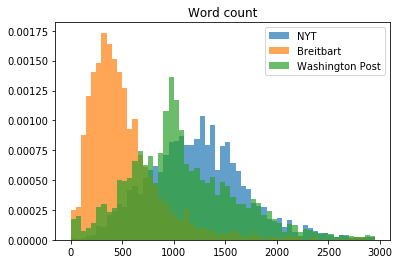

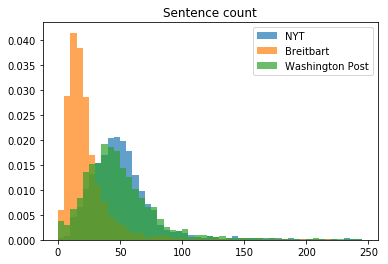

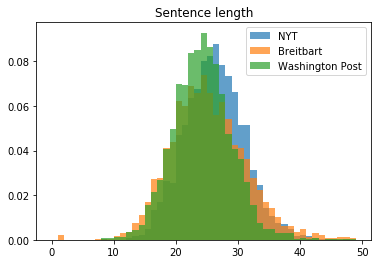

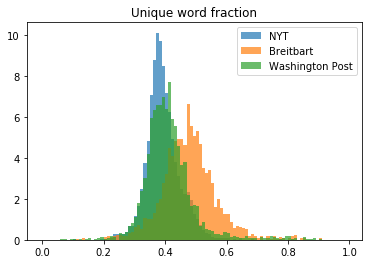

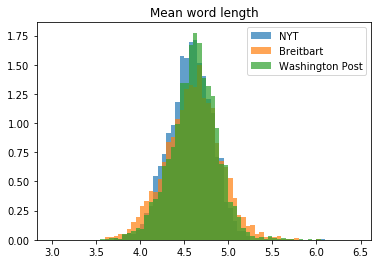

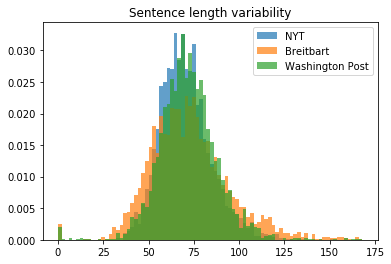

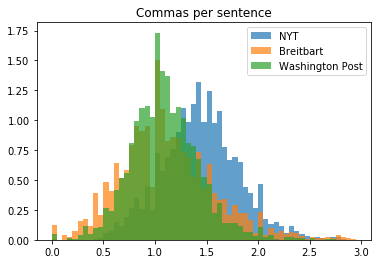

In [9]:
# Word Count

for i in pub_list:
    plt.hist(i.word_count, bins = list(range(0,3000,50)), normed = True, alpha = 0.7)
plt.legend(labels = pub_list_labels)
plt.title("Word count")
plt.show()

# Sentence Count

for i in pub_list:
    plt.hist(i.sent_count, bins = list(range(0,250,5)), normed = True, alpha = 0.7)
plt.legend(labels = pub_list_labels)
plt.title("Sentence count")
plt.show()
# Sentence Length

for i in pub_list:
    plt.hist(i.sent_len, bins = list(range(0,50,1)), normed = True, alpha = 0.7)
plt.legend(labels = pub_list_labels)
plt.title("Sentence length")
plt.show()
# Unique Word Count and Fraction

for i in pub_list:
    plt.hist(i.unique_word_frac, bins = [i/100. for i in list(range(0,100,1))], normed = True, alpha = 0.7)
plt.legend(labels = pub_list_labels)
plt.title("Unique word fraction")
plt.show()

# Mean word length

for i in pub_list:
    plt.hist(i.word_len, bins = [i/100. for i in list(range(300,650,5))], normed = True, alpha = 0.7)
plt.legend(labels = pub_list_labels)
plt.title("Mean word length")
plt.show()

# Sentence length distribution

for i in pub_list:
    plt.hist(i.sent_len_std, bins = list(range(0,170,2)), normed = True, alpha = 0.7)
plt.legend(labels = pub_list_labels)
plt.title("Sentence length variability")
plt.show()

# Commas per sentence

for i in pub_list:
    plt.hist(i.cps, bins = [i/100. for i in list(range(0,300,5))], normed = True, alpha = 0.7)
plt.legend(labels = pub_list_labels)
plt.title("Commas per sentence")
plt.show()

# compare given article to mean values of publications

In [119]:
def compare_article(text_features):
    #pub_list = [nyt, breit, wapo]
    wc_mean = [np.mean(i.word_count) for i in pub_list]
    print(wc_mean)
    #wc_mean1 = [np.mean(nyt_wc), np.mean(breit_wc), np.mean(wapo_wc)]
    #print(wc_mean, wc_mean1)
    sent_len_mean = [np.mean(i.sent_len) for i in pub_list]#, np.mean(breit_sent_len), np.mean(wapo_sent_len)]
    sent_len_std_mean = [np.mean(i.sent_len_std) for i in pub_list]#, np.mean(breit_sent_len_std), np.mean(wapo_sent_len_std)]
    unique_word_frac_mean = [np.mean(i.unique_word_frac) for i in pub_list]#, np.mean(breit_unique_word_frac), np.mean(wapo_unique_word_frac)]
    word_len_mean = [np.mean(i.word_len) for i in pub_list]#, np.mean(breit_word_len), np.mean(wapo_word_len)]
    cps_mean = [np.mean(i.cps) for i in pub_list]#, np.mean(breit_cps), np.mean(wapo_cps)]
    features = ['sentence length', 'sentence length distribution', 'unique word fraction', 'word length', 'commas per sentence']
    mean_features = [[i, j, k, l, m] for i, j, k, l, m in zip(sent_len_mean, sent_len_std_mean, unique_word_frac_mean, word_len_mean, cps_mean)]
    print(mean_features)
    pickle.dump(mean_features, open('mean_features.p', 'wb'))
    return [[float(i/j) for i,j in zip(text_features, pub_features)] for pub_features in mean_features]

In [120]:
def generate_features(text):
    sent_tok, word_tok, string_counts = prepare_text(text)
    sent_tok = sent_tok[0]
    word_tok = word_tok[0]
    string_counts = string_counts[0]
    
    punctuation_set = set(string.punctuation)
    word_count = len([word for word in word_tok if word not in punctuation_set])
    sent_count = len(sent_tok)
    sent_len = float(word_count / sent_count)
    sent_std = np.std([len(sent) for sent in sent_tok])

    unique_word_count = len(set([word for word in word_tok if word not in punctuation_set]))
    unique_word_frac = float(unique_word_count / word_count)
    mean_word_length = np.mean([len(word) for word in word_tok if word not in punctuation_set])

    cps = string_counts[',']/sent_count
    return [sent_len, sent_std, unique_word_frac, mean_word_length, cps]


[20.197183098591548, 69.01703931587748, 0.4302649930264993, 4.46652719665272, 1.3098591549295775]
[1347.7601973684211, 587.0765886287626, 1216.7300392670156]
[[26.312734925852087, 71.14091839782522, 0.3932280585672628, 4.568412788243869, 1.4453067284338383], [25.35519315101246, 74.23027062214763, 0.47902840537547725, 4.616356193633785, 1.1402077779191107], [24.386067322366973, 73.09051896151644, 0.4120775036811656, 4.6154456218211894, 1.1079407332000408]]


([<matplotlib.axis.XTick at 0x7fedf8fbfe80>,
 <a list of 5 Text xticklabel objects>)

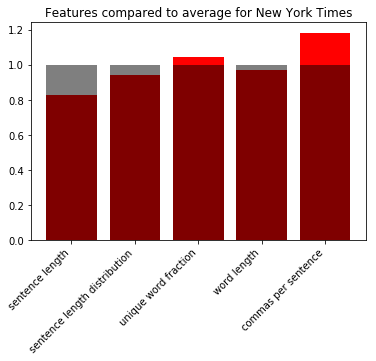

In [121]:
#print(' '.join(nyt_sent[0]))
features = generate_features([' '.join(nyt_sent[10])])

print(features)
features_compare_to_mean = compare_article(features)
features = ['sentence length', 'sentence length distribution', 'unique word fraction', 'word length', 'commas per sentence']
plt.title('Features compared to average for {}'.format("New York Times"))
plt.bar(list(range(5)), features_compare_to_mean[2], color = 'r')
plt.bar(list(range(5)), [1 for _ in range(5)], color = 'black', alpha = 0.5)
#plt.ylim((0,1.2))
plt.xticks(range(5), features, rotation = 45, ha = 'right')
#plt.bar(list(range(5)), features_compare_to_mean[1], alpha = 0.5)

#plt.bar(list(range(5)), features_compare_to_mean[2], alpha = 0.5)


### from sklearn import tree
#X = [[0, 0], [1, 1]]
#Y = [0, 1]
#clf = tree.DecisionTreeClassifier()
#clf = clf.fit(X, Y)

In [11]:
#join data
wc = []
sent_len = []
sent_len_std = []
unique_word_frac = []
word_len = []
cps = []
#feature names: word_count, sent_count, sent_len, unique_word_frac, word_len, sent_len_std, cps
for i in pub_list:
    wc += i.word_count
    sent_len += i.sent_len
    word_len += i.word_len
    sent_len_std += i.sent_len_std
    unique_word_frac += i.unique_word_frac
    cps += i.cps
#wc = nyt_wc + breit_wc + wapo_wc
#sent_len = nyt_sent_len + breit_sent_len + wapo_sent_len
#sent_len_std = nyt_sent_len_std + breit_sent_len_std + wapo_sent_len_std
#unique_word_frac = nyt_unique_word_frac + breit_unique_word_frac + wapo_unique_word_frac
#word_len = nyt_word_len + breit_word_len + wapo_word_len
#cps = nyt_cps + breit_cps + wapo_cps
#print(len(wc), len(word_length))

In [50]:
#combine features
X = [[i, j, k, l, m, n] for i, j, k, l, m, n in zip(wc, sent_len, sent_len_std, unique_word_frac, word_len, cps)]
n_samples = len(X)
data_boundaries = [len(i.word_count) for i in pub_list]
print(data_boundaries)
cumulative_bounds = [0]
for ci, i in enumerate(data_boundaries):
    cumulative_bounds.append(i+cumulative_bounds[ci])
print(cumulative_bounds)
#cumulative_bounds = [0]
#cumulative_bounds = [cumulative_bounds[i-1] + i for i in data_boundaries]
print(len(X))

[3040, 2990, 3056]
[0, 3040, 6030, 9086]
9086


In [37]:
#labels
Y = [0 for i in range(len(nyt.word_count))] + [1 for i in range(len(breit.word_count))] + [2 for i in range(len(wapo.word_count))]
print(len(Y))

9086


In [64]:
#test train split
from sklearn.model_selection import train_test_split

indices = np.arange(n_samples)

X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(X, Y, indices, test_size=0.2)
print(idx_train)
print(idx_test)

[6497 3573 4499 ... 6186 1472 2609]
[8404 1369 5826 ... 3167 6538 3656]


In [65]:
#from sklearn.model_selection import GridSearchCV
#parameters = {'max_depth':range(3,20)}
#clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4)
#clf.fit(X=X_train, y=y_train)
#tree_model = clf.best_estimator_
#print (clf.best_score_, clf.best_params_) 


#clf = tree.DecisionTreeClassifier(max_depth = 5)
#clf = clf.fit(X_train, y_train)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X_train, y_train)

In [66]:
y_pred = clf.predict(X_test)
#chance = [0 if random.random() > 0.5 else 1 for _ in range(len(y_pred))]

Normalized confusion matrix
[[0.74 0.09 0.16]
 [0.11 0.73 0.16]
 [0.25 0.22 0.53]]


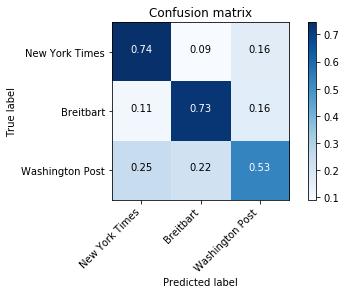

In [67]:
from sklearn.metrics import confusion_matrix
import itertools
class_names = ['New York Times', 'Breitbart', 'Washington Post']

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, ha = 'right')
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix', normalize = True)


In [70]:
conf_mat = np.zeros((3,3))
count = 0
for pred, true in zip(y_pred, y_test):
    if pred == 2 and true == 1:
            print(pred, true, count, 'mismatch')
            print(' '.join(wapo.sent_tok[idx_test[count] - cumulative_bounds[2]]))
            input()
    conf_mat[pred,true] += 1.
    count += 1
print(count)
#conf_mat[2,1] += 1000
#[y,x] format (first index (predicted) is on the vertical, second index (truth) is on the horizontal)
plt.imshow(conf_mat)
plt.colorbar()
print(conf_mat, np.sum(conf_mat))
print(Counter(y_test))

2 1 27 mismatch
everything in the lab gleams. there is no smell and no sound but the insectlike whir of the machine that pumps nitrogen gas into the dozen or so glass storage tanks lining the walls. the pressure of the gas inflates the white rubber gloves attached to the tanks and makes them reach, ghostlike, toward the center of the room. the national museum of natural history’s support center in suitland, md. contains some of the rarest and most precious objects owned by the american people: 17, 000 rocks. they represent the bulk of the nation’s antarctic meteorite collection, an assortment that includes pieces of other planets, shrapnel from the collisions that shaped the solar system, rubble older than anything on earth and crystals possibly older than the sun. retrieved from the bottom of the world and stored for decades in inert nitrogen gas, the collection offers clues to some of the biggest mysteries of existence. "each meteorite is a piece of the bigger puzzle about how our so


2 1 51 mismatch
the white man charged with killing nine black parishioners at a church in charleston, s. c. last year will be allowed to represent himself in his federal   trial, a judge said monday. this means that dylann roof, 22, could question survivors of the attack if they are called to testify in the case, one of two trials he faces for the massacre at emanuel ame church. in addition to being indicted on federal   charges, roof has been charged with murder and attempted murder in state court, and he faces potential death sentences in both trials. u. s. district judge richard gergel’s decision monday came as jury selection is getting underway in the federal trial after a   delay. jury selection was initially scheduled to begin earlier this month, but it was abruptly postponed after   questions arose about roof’s ability to understand the proceedings and assist in his own defense. on friday, gergel ruled that roof was competent to stand trial, although he kept sealed his exact re


2 1 129 mismatch
the crowd rose to its feet and roared its approval as sen. jeff sessions bounded onto the stage at the breakers, an exclusive resort in palm beach, fla. stephen miller, an aide to the alabama republican, handed him a glass trophy honoring his bravery as a lawmaker. "heyyyy!" sessions yelled out to the crowd. the ceremony that day, in november 2014, turned out to be a harbinger: it brought together an array of   activists and a   charity whose ideas would soon move from the fringes of the conservative movement into the heart of the nation’s government. the man behind the event was david horowitz, a former ’60s radical who became an intellectual godfather to the far right through his writings and his work at a charity, the david horowitz freedom center. since its formation in 1988, the freedom center has helped cultivate a generation of political warriors seeking to upend the washington establishment. these warriors include some of the most powerful and influential figu


2 1 143 mismatch
to taste a cronut  —   an actual, legit cronut  —   you must be willing to brave the sea of humanity that amasses each morning outside dominique ansel bakery in manhattan. you can also go to a dunkin’ donuts in pretty much any city and order something that’s kind of like ansel’s iconic pastry, cut from croissant dough and then deep fried. or, in sacramento, you could have a doissant. in san francisco, you can scarf down a cruffin, which is not a doughnut at all, but hey, close enough. given how fast food trends emerge and travel, it’s not surprising that there’s a cronut, or  . but the hottest food trend of the past five years may be copycatting. call it food plagiarism. and the examples go way beyond the cronut. kimchi quesadillas and   tacos were the brilliant pairings that launched los angeles’s roy choi and the kogi food trucks  —   and then set off an   of   knockoffs. new york’s doughnut plant claims to have cooked up square jelly doughnuts nearly a decade ago; 


2 1 150 mismatch
as donald trump marches towards the gop nomination, it’s worth pointing out two stories from this past week about what the next president can do as the foreign policy leader of the nation. in the atlantic, conor friedersdorf discusses what the president can do on the security front without any congressional constraint  …     and walks away terrified: let me put things more starkly: under current precedent, the commander in chief can give a secret order to kill an american citizen with a drone strike without charges or trial. should donald trump have that power? …     before moving into a new house, parents of small children engage in  . before leaving the white house, obama should engage in  . for eight years, he has evinced a high opinion of his own ability to exercise power morally, even in situations where senator obama thought that the president should be restrained. at this point, better to flatter his ego than to resist it. you’ll be gone soon, mr. president, an

KeyboardInterrupt: 

In [ ]:
from sklearn.externals import joblib
joblib.dump(clf, 'decision_tree_10.pkl') 

Feature ranking:
1. feature 2 (0.269717)
2. feature 4 (0.235243)
3. feature 1 (0.184715)
4. feature 0 (0.156361)
5. feature 3 (0.153964)
[2 4 1 0 3]


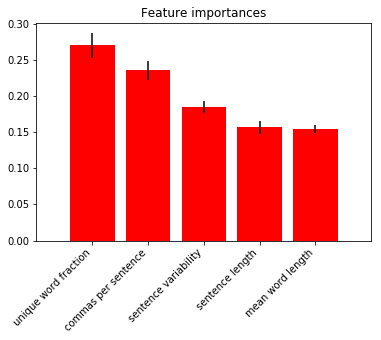

In [79]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(len(X[0])):#.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
feature_names = ['sentence length', 'sentence variability', 'unique word fraction', 'mean word length', 'commas per sentence']
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(len(X[0])), importances[indices],
       color="r", yerr=std[indices], align="center")
print(indices)
plt.xticks(range(len(X[0])), [feature_names[i] for i in indices], rotation = 45, ha = 'right')
plt.xlim([-1, len(X[0])])
plt.show()


In [176]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

[[0.25628141 0.24221106 0.        ]
 [0.26582915 0.23567839 0.        ]
 [0.         0.         0.        ]] 1.0000000000000127


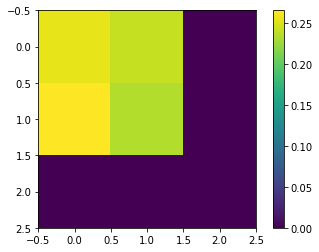

In [61]:
conf_mat = np.zeros((3,3))
for pred_chance, true in zip(chance, y_test):
    conf_mat[pred_chance,true] += 1./len(y_pred)

plt.imshow(conf_mat)
plt.colorbar()
print(conf_mat, np.sum(conf_mat))

In [ ]:
total_df = 0

In [ ]:
#import graphviz 
#dot_data = tree.export_graphviz(clf, out_file='graph') 
#graph = graphviz.Source(dot_data) 
#graph.render("iris") 

In [ ]:
print(wapo_collect[0])

In [ ]:
#get content column into list
article_list = total_df['content'].tolist()
print(article_list[:10])

In [ ]:
word_count_list = [len(text.split()) for text in article_list[:10000]]
print(word_count_list[:100])

In [ ]:
translator = str.maketrans('', '', string.punctuation)
unique_word_list = [set(text.lower().translate(translator).split()) for text in article_list[:10000]]
print(unique_word_list[:1])
#df.loc[row, column] = pd.DataFrame({'fake_key': list})

ADD WORDCOUNT COLUMN

In [ ]:
def word_count(pub_name):
    total_df.loc[total_df['publication'] == pub_name, 'word_count'] = total_df.loc[total_df['publication'] == pub_name, 'content'].str.split().str.len()
    #nyt_group['word_count'] = nyt_group['content'].str.split().str.len()
    #print(nyt_group.head(10))
    print(list(total_df))
    #print(total_df.loc[total_df['publication'] == pub_name])

In [ ]:
word_count('Washington Post')
word_count('New York Times')
word_count('Vox')
word_count('Fox News')
#print(total_df.loc[total_df['publication'] == 'Washington Post']['word_count'].head(20))
#wapo_group['word_count'] = wapo_group['content'].str.split().str.len()
#print(wapo_group['word_count'].head(20))

In [ ]:
print(total_df.groupby('publication')['word_count'].describe())

ADD SENTENCE LENGTH COLUMN

In [ ]:
def sentence_count(pub_name):
    total_df.loc[total_df['publication'] == pub_name, 'sentence_count'] = total_df.loc[total_df['publication'] == pub_name]['content'].apply(lambda row: len(sent_detector.tokenize(row.strip())))
    #nyt_group['word_count'] = nyt_group['content'].str.split().str.len()
    #print(nyt_group.head(10))
    print(list(total_df))
    #print(total_df.loc[total_df['publication'] == pub_name])

#nyt_group['sentence_count'] = nyt_group['content']
#print(nyt_group.sentence_count)

In [ ]:
sentence_count('Washington Post')
sentence_count('New York Times')
sentence_count('Vox')
sentence_count('Fox News')
#sentence_count('')

In [ ]:
print(total_df.groupby('publication')['sentence_count'].describe())
#print(total_df.head(2))

In [ ]:
#plot word count vs sentence length
#total_df.groupby('publication').plot(x='word_count', y='sentence_count', style='o')
plt.scatter(total_df.loc[total_df['publication'] == 'New York Times','word_count'], total_df.loc[total_df['publication'] == 'New York Times','sentence_count'])
plt.scatter(total_df.loc[total_df['publication'] == 'Washington Post','word_count'], total_df.loc[total_df['publication'] == 'Washington Post','sentence_count'])
plt.scatter(total_df.loc[total_df['publication'] == 'Vox','word_count'], total_df.loc[total_df['publication'] == 'Vox','sentence_count'])
plt.scatter(total_df.loc[total_df['publication'] == 'Fox News','word_count'], total_df.loc[total_df['publication'] == 'Fox News','sentence_count'])

plt.xlim((0,5000))

plt.ylim((0,200))
plt.show()

In [ ]:
#total_df['unique_word_count'] = 0

In [ ]:
def unique_word_count(pub_name):
    col_name = 'unique_word_count'
    total_df.loc[total_df['publication'] == pub_name, col_name] = total_df.loc[total_df['publication'] == pub_name]['content'].apply(lambda row: len(set(row.lower().split())))
    #nyt_group['word_count'] = nyt_group['content'].str.split().str.len()
    #print(nyt_group.head(10))
    print(list(total_df))
    #print(total_df.loc[total_df['publication'] == pub_name])

#nyt_group['sentence_count'] = nyt_group['content']
#print(nyt_group.sentence_count)

In [ ]:
#unique_word_count('New York Times')
#unique_word_count('Vox')
#unique_word_count('Washington Post')
unique_word_count('Fox News')
print(total_df.groupby('publication')['unique_word_count'].describe())

In [ ]:
#total_df.groupby('publication').plot(x='word_count', y='sentence_count', style='o')
plt.scatter(total_df.loc[total_df['publication'] == 'New York Times','sentence_count'], total_df.loc[total_df['publication'] == 'New York Times','unique_word_count'], s=4)
plt.scatter(total_df.loc[total_df['publication'] == 'Washington Post','sentence_count'], total_df.loc[total_df['publication'] == 'Washington Post','unique_word_count'], s=4)
plt.scatter(total_df.loc[total_df['publication'] == 'Vox','sentence_count'], total_df.loc[total_df['publication'] == 'Vox','unique_word_count'], s=4)
plt.scatter(total_df.loc[total_df['publication'] == 'Fox News','sentence_count'], total_df.loc[total_df['publication'] == 'Fox News','unique_word_count'], s=4)

plt.xlim((0,200))

plt.ylim((0,1000))
plt.show()

In [ ]:
#sub_df_max_wordcount = sub_df
total_df.groupby('publication')['word_count'].hist(bins = 100, alpha = 0.5, normed = True)